In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('hackathon_train.csv').drop(['ID','Distribution Channel','Gender'],1)
df_train.head()

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


In [3]:
df_valid = pd.read_csv('hackathon_test.csv').drop(['ID','Distribution Channel','Gender'],1)
df_valid.head()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,47
1,EPX,Travel Agency,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,24
2,EPX,Travel Agency,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,36
3,EPX,Travel Agency,2 way Comprehensive Plan,41,CHINA,28.0,0.0,36
4,EPX,Travel Agency,Cancellation Plan,16,SINGAPORE,11.0,0.0,36


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 9 columns):
Agency                  50553 non-null object
Agency Type             50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Age                     50553 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.5+ MB


In [5]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12661 entries, 0 to 12660
Data columns (total 8 columns):
Agency                  12661 non-null object
Agency Type             12661 non-null object
Product Name            12661 non-null object
Duration                12661 non-null int64
Destination             12661 non-null object
Net Sales               12661 non-null float64
Commision (in value)    12661 non-null float64
Age                     12661 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 791.4+ KB


In [6]:
cols_con = df_train.select_dtypes(['int64','float64']).drop('Claim',1)#.columns
cols_non_con = df_train.select_dtypes(['object'])#.columns

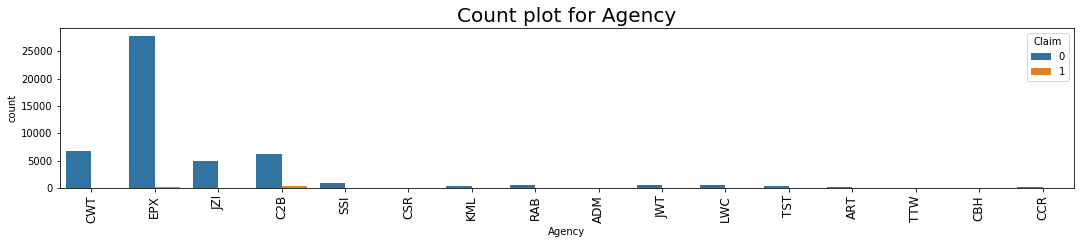

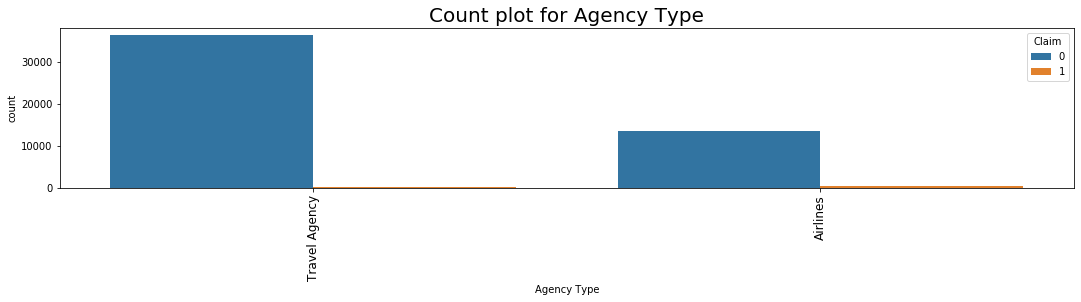

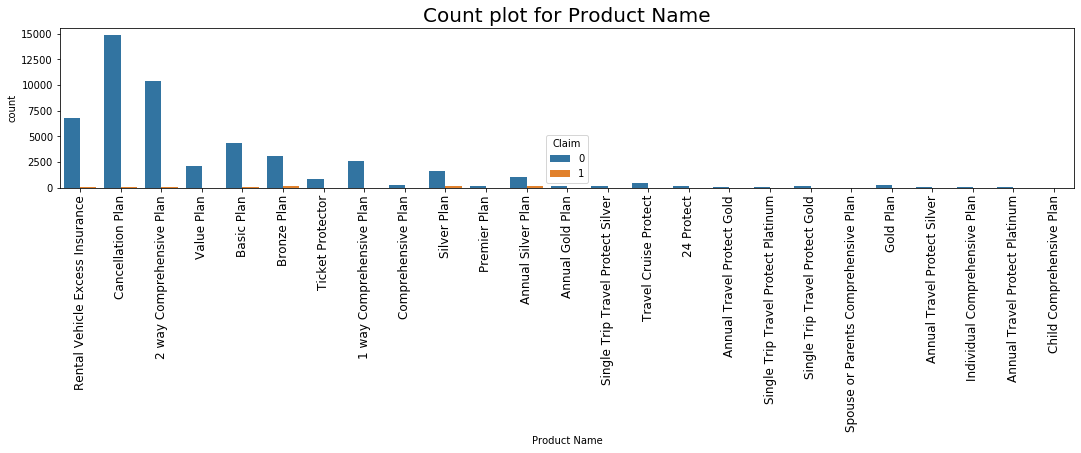

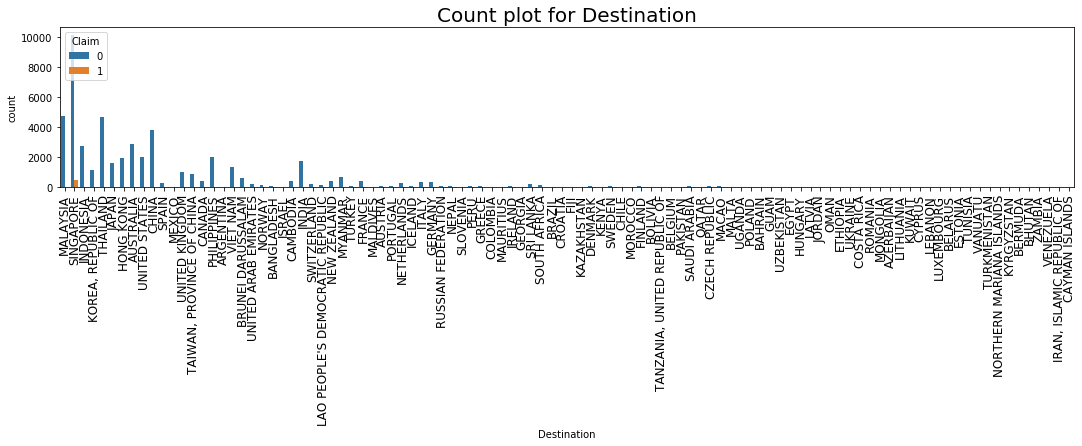

In [7]:
n=1
for j in cols_non_con.columns:
    plt.figure(figsize=(40,10))
    plt.subplot(3,2,n)
    sns.countplot(df_train[j],hue=df_train['Claim'])
    plt.title('Count plot for '+j,fontsize=20)
    n+=1
    plt.xticks(rotation=90,fontsize=12)
#     plt.show()

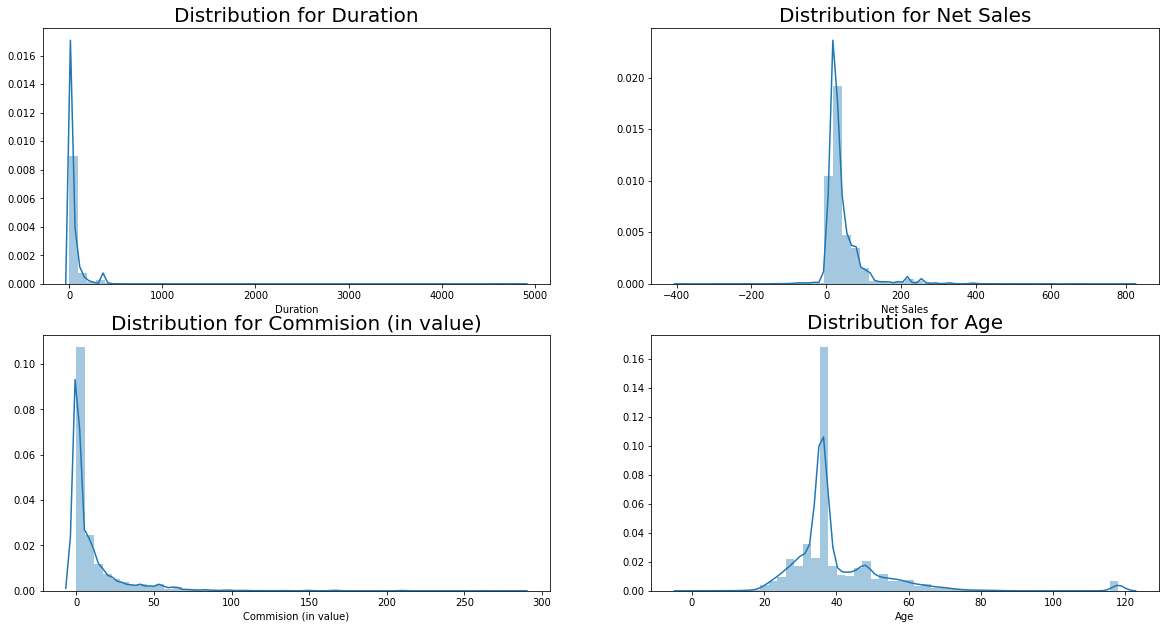

In [8]:
# for i in cols_con:
#     sns.distplot(df_train[i])
#     plt.show()
    
n = 1
plt.figure(figsize = (20,16))
for i in cols_con.columns:
    plt.subplot(3,2,n)
    sns.distplot(df_train[i])
    plt.title('Distribution for '+i,fontsize=20)
    n+=1

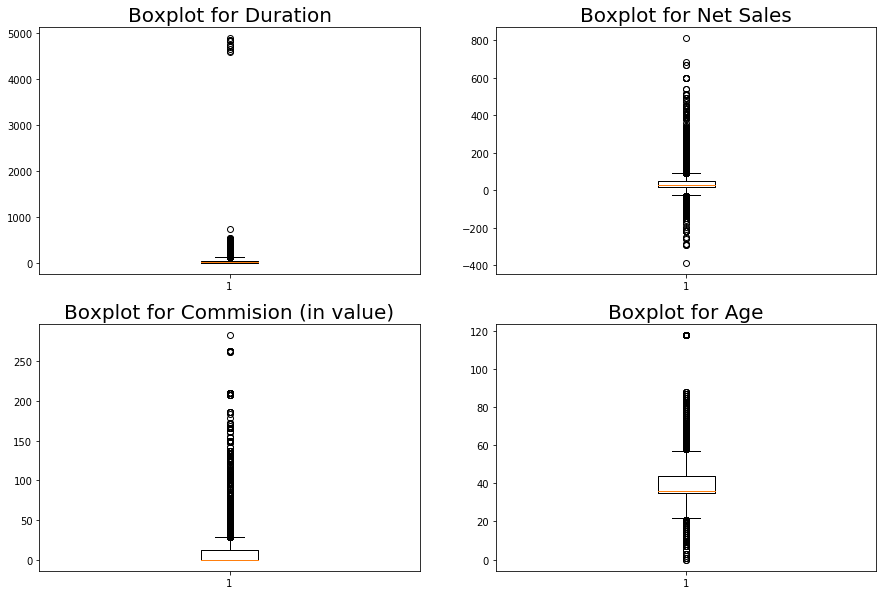

In [10]:
n=1
plt.figure(figsize=(15,10))
for box in cols_con.columns:
    plt.subplot(2,2,n)
    plt.boxplot(cols_con[box])
    plt.title('Boxplot for '+box,fontsize=20)   
    n+=1

In [11]:
df_train[df_train['Duration'] < 0]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4063,JZI,Airlines,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [12]:
print('Mean DURATION for destination INDONESIA',df_train[(df_train['Agency'] == 'JZI') &(df_train['Agency Type'] == 'Airlines')&(df_train['Product Name'] == 'Basic Plan')&(df_train['Destination'] == 'INDONESIA')& (df_train['Claim'] ==0)& (df_train['Net Sales'] ==18.0)& (df_train['Commision (in value)'] ==6.3)]['Duration'].mean())
print('Mean DURATION for destination BANGLADESH',df_train[(df_train['Agency'] == 'JZI') &(df_train['Agency Type'] == 'Airlines') &(df_train['Product Name'] == 'Basic Plan')&(df_train['Destination'] == 'BANGLADESH')& (df_train['Claim'] ==0)& (df_train['Net Sales'] ==22.0)& (df_train['Commision (in value)'] ==7.7)]['Duration'].mean())
print('Mean DURATION for destination BRUNEI DARUSSALAM',df_train[(df_train['Agency'] == 'JZI') &(df_train['Agency Type'] == 'Airlines') &(df_train['Product Name'] == 'Basic Plan')&(df_train['Destination'] == 'BRUNEI DARUSSALAM')& (df_train['Claim'] ==0)& (df_train['Net Sales'] ==18.0)& (df_train['Commision (in value)'] ==6.3)]['Duration'].mean())

Mean DURATION for destination INDONESIA 15.64406779661017
Mean DURATION for destination BANGLADESH 5.0
Mean DURATION for destination BRUNEI DARUSSALAM 2.8


In [13]:
df_train.loc[(df_train.Duration == -1) & (df_train.Destination == 'BRUNEI DARUSSALAM'), 'Duration'] = 3
df_train.loc[df_train.Duration == -2, 'Duration'] = 5
df_train.loc[(df_train.Duration == -1) & (df_train.Destination == 'INDONESIA'), 'Duration'] = 15

In [14]:
df_train[df_train['Duration'] < 0]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [15]:
df_valid[df_valid['Duration'] < 0]#.unique()#.sort()#.value_counts()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
802,JZI,Airlines,Basic Plan,-1,CHINA,22.0,7.7,118
4432,JZI,Airlines,Basic Plan,-1,MALAYSIA,18.0,6.3,118


In [16]:
print('Mean DURATION for destination CHINA',df_valid[(df_valid['Agency'] == 'JZI') &(df_valid['Agency Type'] == 'Airlines')&(df_valid['Product Name'] == 'Basic Plan')&(df_valid['Destination'] == 'CHINA')& (df_valid['Net Sales'] ==22.0)& (df_valid['Commision (in value)'] ==7.7)]['Duration'].mean())
print('Mean DURATION for destination MALAYSIA',df_valid[(df_valid['Agency'] == 'JZI') &(df_valid['Agency Type'] == 'Airlines') &(df_valid['Product Name'] == 'Basic Plan')&(df_valid['Destination'] == 'MALAYSIA')& (df_valid['Net Sales'] ==18.0)& (df_valid['Commision (in value)'] ==6.3)]['Duration'].mean())

Mean DURATION for destination CHINA 9.74468085106383
Mean DURATION for destination MALAYSIA 13.68918918918919


In [17]:
df_valid.loc[(df_valid.Duration == -1) & (df_valid.Destination == 'MALAYSIA'), 'Duration'] = 13
df_valid.loc[(df_valid.Duration == -1) & (df_valid.Destination == 'CHINA'), 'Duration'] = 9

In [18]:
df_valid[df_valid['Duration'] < 0]#.unique()#.sort()#.value_counts()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age


In [19]:
df_train[(df_train['Age'] <= 50)&(df_train['Age'] >=16 )& (df_train['Duration'] > 1095)]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
12083,SSI,Airlines,Ticket Protector,0,4609,SINGAPORE,0.32,0.09,48
15326,SSI,Airlines,Ticket Protector,0,4580,SINGAPORE,0.32,0.09,48
16797,SSI,Airlines,Ticket Protector,0,4685,SINGAPORE,0.32,0.09,48
17702,SSI,Airlines,Ticket Protector,0,4736,SINGAPORE,0.32,0.09,48
23844,SSI,Airlines,Ticket Protector,0,4844,SINGAPORE,0.32,0.09,48
27270,SSI,Airlines,Ticket Protector,0,4857,SINGAPORE,0.32,0.09,48
28143,SSI,Airlines,Ticket Protector,0,4815,SINGAPORE,0.32,0.09,48
30465,SSI,Airlines,Ticket Protector,0,4652,SINGAPORE,0.32,0.09,48
31070,SSI,Airlines,Ticket Protector,0,4829,SINGAPORE,0.32,0.09,48
42137,SSI,Airlines,Ticket Protector,0,4738,SINGAPORE,0.32,0.09,48


In [20]:
df_train.loc[(df_train['Age'] <= 50)&(df_train['Age'] >=16 )& (df_train['Duration'] > 1095),'Duration'] = 1095

In [21]:
df_train[(df_train['Age'] <= 50)&(df_train['Age'] >=16 )& (df_train['Duration']== 1095)]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
12083,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
15326,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
16797,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
17702,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
23844,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
27270,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
28143,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
30465,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
31070,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48
42137,SSI,Airlines,Ticket Protector,0,1095,SINGAPORE,0.32,0.09,48


In [22]:
df_valid[(df_valid['Age'] <= 50)&(df_valid['Age'] >=16 )& (df_valid['Duration'] > 1095)]

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
1118,SSI,Airlines,Ticket Protector,4784,SINGAPORE,0.32,0.09,48
4157,SSI,Airlines,Ticket Protector,4831,SINGAPORE,0.32,0.09,48
12170,SSI,Airlines,Ticket Protector,4847,SINGAPORE,0.32,0.09,48


In [23]:
df_valid.loc[(df_valid['Age'] <= 50)&(df_valid['Age'] >=16 )& (df_valid['Duration'] > 1095),'Duration'] = 1095

In [24]:
df_valid[(df_valid['Age'] <= 50)&(df_valid['Age'] >=16 )& (df_valid['Duration'] == 1095)]

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
1118,SSI,Airlines,Ticket Protector,1095,SINGAPORE,0.32,0.09,48
4157,SSI,Airlines,Ticket Protector,1095,SINGAPORE,0.32,0.09,48
12170,SSI,Airlines,Ticket Protector,1095,SINGAPORE,0.32,0.09,48


In [25]:
df_train.loc[(df_train['Age'] < 16)&(df_train['Duration'] >183) |(df_train['Age'] >50 )&(df_train['Duration'] >183)].head()

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
64,C2B,Airlines,Annual Silver Plan,0,386,SINGAPORE,216.0,54.00,53
156,EPX,Travel Agency,Cancellation Plan,0,219,CANADA,80.0,0.00,54
192,CWT,Travel Agency,Rental Vehicle Excess Insurance,0,307,NEW ZEALAND,0.0,47.52,55
367,C2B,Airlines,Annual Gold Plan,0,373,SINGAPORE,0.0,97.34,52
469,EPX,Travel Agency,2 way Comprehensive Plan,0,208,UNITED STATES,112.0,0.00,54


In [26]:
df_train.loc[(df_train['Age'] < 16)&(df_train['Duration'] >183) |(df_train['Age'] >50 )&(df_train['Duration'] >183),'Duration'] = 183

In [27]:
df_train.loc[(df_train['Age'] < 16)&(df_train['Duration'] >183) |(df_train['Age'] >50 )&(df_train['Duration'] ==183)].head()

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
64,C2B,Airlines,Annual Silver Plan,0,183,SINGAPORE,216.0,54.00,53
156,EPX,Travel Agency,Cancellation Plan,0,183,CANADA,80.0,0.00,54
192,CWT,Travel Agency,Rental Vehicle Excess Insurance,0,183,NEW ZEALAND,0.0,47.52,55
367,C2B,Airlines,Annual Gold Plan,0,183,SINGAPORE,0.0,97.34,52
469,EPX,Travel Agency,2 way Comprehensive Plan,0,183,UNITED STATES,112.0,0.00,54


In [28]:
df_valid.loc[(df_valid['Age'] < 16)&(df_valid['Duration'] >183) |(df_valid['Age'] >50 )&(df_valid['Duration'] >183)].head()


,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
32,C2B,Airlines,Annual Silver Plan,365,SINGAPORE,252.85,63.21,61
50,JZI,Airlines,Value Plan,233,CHINA,45.00,15.75,52
84,TTW,Travel Agency,Child Comprehensive Plan,369,SINGAPORE,74.00,0.00,9
111,C2B,Airlines,Annual Silver Plan,375,SINGAPORE,187.85,46.96,67
114,C2B,Airlines,Annual Silver Plan,365,SINGAPORE,291.75,72.94,60


In [29]:
df_valid.loc[(df_valid['Age'] < 16)&(df_valid['Duration'] >183) |(df_valid['Age'] >50 )&(df_valid['Duration'] >183),'Duration'] = 183

In [30]:
df_valid.loc[(df_valid['Age'] < 16)&(df_valid['Duration'] >183) |(df_valid['Age'] >50 )&(df_valid['Duration'] ==183)].head()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
32,C2B,Airlines,Annual Silver Plan,183,SINGAPORE,252.85,63.21,61
50,JZI,Airlines,Value Plan,183,CHINA,45.00,15.75,52
111,C2B,Airlines,Annual Silver Plan,183,SINGAPORE,187.85,46.96,67
114,C2B,Airlines,Annual Silver Plan,183,SINGAPORE,291.75,72.94,60
128,JZI,Airlines,Basic Plan,183,CHINA,44.00,15.40,53


In [31]:
df_train[(df_train['Net Sales'] <=0) & (df_train['Claim'] ==1)]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
6597,EPX,Travel Agency,Cancellation Plan,1,28,SPAIN,-10.0,0.0,36
26666,JZI,Airlines,Basic Plan,1,3,HONG KONG,-22.0,7.7,59
30272,EPX,Travel Agency,2 way Comprehensive Plan,1,128,"KOREA, REPUBLIC OF",-37.0,0.0,36


In [32]:
df_train.loc[(df_train['Net Sales'] <=0) & (df_train['Claim'] ==1), 'Net Sales'] = abs(df_train.loc[(df_train['Net Sales'] <=0) & (df_train['Claim'] ==1), 'Net Sales']) 

In [33]:
df_train[(df_train['Net Sales'] <=0) & (df_train['Claim'] ==1)]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [34]:
df_train[df_train['Age']>99].head()

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Airlines,Value Plan,0,58,INDIA,78.0,31.2,118
108,JWT,Airlines,Value Plan,0,15,INDIA,31.0,12.4,118
140,JWT,Airlines,Value Plan,0,8,INDIA,39.0,15.6,118
153,JWT,Airlines,Value Plan,0,4,INDIA,78.0,31.2,118
181,JWT,Airlines,Value Plan,0,0,INDIA,31.0,12.4,118


In [35]:
df_train.loc[(df_train['Age']>99),'Age'] = 99

In [36]:
df_train[df_train['Age']==99].head()

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Airlines,Value Plan,0,58,INDIA,78.0,31.2,99
108,JWT,Airlines,Value Plan,0,15,INDIA,31.0,12.4,99
140,JWT,Airlines,Value Plan,0,8,INDIA,39.0,15.6,99
153,JWT,Airlines,Value Plan,0,4,INDIA,78.0,31.2,99
181,JWT,Airlines,Value Plan,0,0,INDIA,31.0,12.4,99


In [37]:
df_train[(df_train['Duration']==0)&(df_train['Claim']==1)]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age


In [38]:
#df_train[df_train.drop('ID',1).duplicated(keep='first') == False].count()
df_train = df_train.drop_duplicates(keep= 'first')#.count()

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44338 entries, 0 to 50552
Data columns (total 9 columns):
Agency                  44338 non-null object
Agency Type             44338 non-null object
Product Name            44338 non-null object
Claim                   44338 non-null int64
Duration                44338 non-null int64
Destination             44338 non-null object
Net Sales               44338 non-null float64
Commision (in value)    44338 non-null float64
Age                     44338 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.4+ MB


In [40]:
cols_con = df_train.select_dtypes(['int64','float64']).drop('Claim',1)
cols_non_con = df_train.select_dtypes(['object'])
cols_non_con = cols_non_con.astype('category')
cols_non_con.dtypes

Agency          category
Agency Type     category
Product Name    category
Destination     category
dtype: object

In [41]:
cols_con_valid = df_valid.select_dtypes(['int64','float64'])#.columns
cols_non_con_valid = df_valid.select_dtypes(['object'])#.columns
cols_non_con_valid = cols_non_con_valid.astype('category')
cols_non_con_valid.dtypes

Agency          category
Agency Type     category
Product Name    category
Destination     category
dtype: object

In [42]:
label_cols = pd.DataFrame()
label = LabelEncoder()
for k in cols_non_con.columns:
    label_cols[k] = label.fit_transform(cols_non_con[k])

In [43]:
train_new = pd.concat([cols_con,label_cols],1)

In [44]:
train_new.head()

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Product Name,Destination
0,7.0,0.0,17.82,31.0,6.0,1.0,16.0,56.0
1,85.0,69.0,0.00,36.0,7.0,1.0,10.0,79.0
2,11.0,19.8,11.88,75.0,6.0,1.0,16.0,56.0
3,16.0,20.0,0.00,32.0,7.0,1.0,1.0,38.0
4,10.0,15.0,0.00,29.0,7.0,1.0,10.0,47.0


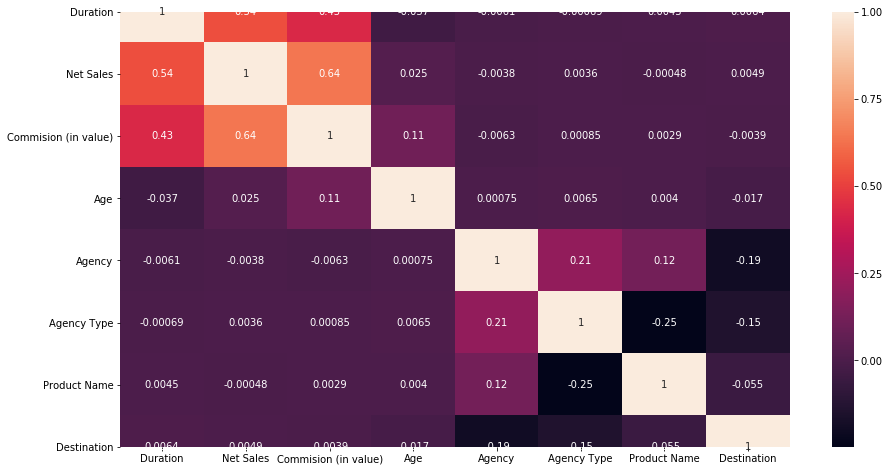

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(train_new.corr(),annot=True)

In [46]:
correlation = train_new.corr().unstack()
correlation[(abs(correlation)>0.75) & (abs(correlation) != 1)]

Series([], dtype: float64)

In [47]:
cols_non_con = pd.get_dummies(cols_non_con)
cols_non_con_valid = pd.get_dummies(cols_non_con_valid)

In [48]:
cols_non_con.head()

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
cols_non_con_valid.head()

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
train_new = pd.concat([cols_con,cols_non_con],1)

In [51]:
train_new.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,7,0.0,17.82,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,69.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,19.8,11.88,75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,20.0,0.00,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,15.0,0.00,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_valid_new = pd.concat([cols_con_valid,cols_non_con_valid],1)

In [53]:
df_valid_new.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,58,49.5,29.7,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,20.0,0.0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68,20.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41,28.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,11.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X = train_new
y = df_train['Claim']

In [149]:
scaler = MinMaxScaler()
X[cols_con.columns] = scaler.fit_transform(X[cols_con.columns])
df_valid_new[cols_con_valid.columns] = scaler.transform(df_valid_new[cols_con_valid.columns])

In [150]:
X.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,0.006393,0.324437,0.062857,0.313131,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.077626,0.381985,0.000000,0.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.010046,0.340951,0.041905,0.757576,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.014612,0.341118,0.000000,0.323232,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.009132,0.336947,0.000000,0.292929,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df_valid_new.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,0.052968,0.365721,0.104762,0.474747,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.003653,0.341118,0.000000,0.242424,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.062100,0.341118,0.000000,0.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.037443,0.347790,0.000000,0.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.014612,0.333611,0.000000,0.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42,stratify = y)

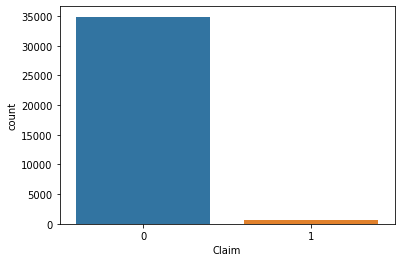

In [158]:
sns.countplot(y_train)

In [159]:
# sm = SMOTE(random_state=12)
# X_train_rs,y_train_rs = sm.fit_resample(X_train,y_train)
# X_train = pd.DataFrame(X_train_rs,columns=X.columns)
# y_train = pd.Series(y_train_rs, name='Claim')
# sns.countplot(y_train)

In [160]:
y_train.value_counts()

0    34881
1      589
Name: Claim, dtype: int64

In [165]:
model_lr = LogisticRegression(random_state=42,class_weight='balanced')
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_proba = np.array(pd.DataFrame(model_lr.predict_proba(X_test)).iloc[:,1])
model_lr.score(X_test,y_test)

0.7967974740640505

In [166]:
print('Report for logistic model\n',classification_report(y_test,y_pred_lr))
print('ROC AUC score for logistic model is ',roc_auc_score(y_test,y_pred_lr_proba))
print('precision Score for logistic model is',precision_score(y_test,y_pred_lr,average='weighted'))
print('recall Score for logistic model is',recall_score(y_test,y_pred_lr,average='weighted'))

Report for logistic model
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      8721
           1       0.05      0.67      0.10       147

    accuracy                           0.80      8868
   macro avg       0.52      0.74      0.49      8868
weighted avg       0.98      0.80      0.87      8868

ROC AUC score for logistic model is  0.774799588451365
precision Score for logistic model is 0.9775801171756473
recall Score for logistic model is 0.7967974740640505


In [167]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_lr).ravel()
print('ConfusionMatrix for logistic model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for logistic model
tp fp
99 1754 

fn tn
48 6967


In [80]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 12,class_weight='balanced')
dt2.fit(X_train,y_train)
dt_pred = dt2.predict(X_test)
dt_pred_proba = np.array(pd.DataFrame(dt2.predict_proba(X_test)).iloc[:,1])
dt2.score(X_test,y_test)

0.8662607126747858

In [81]:
print('Report for decision tree model\n',classification_report(y_test,dt_pred))
print('ROC AUC score for decision tree model is ',roc_auc_score(y_test,dt_pred_proba))
print('precision Score for decision tree model is',precision_score(y_test,dt_pred,average='weighted'))
print('recall Score for decision model is',recall_score(y_test,dt_pred,average='weighted'))

Report for decision tree model
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      8721
           1       0.07      0.55      0.12       147

    accuracy                           0.87      8868
   macro avg       0.53      0.71      0.52      8868
weighted avg       0.98      0.87      0.91      8868

ROC AUC score for decision tree model is  0.7550852699754367
precision Score for decision tree model is 0.9760758984442016
recall Score for decision model is 0.8662607126747858


In [82]:
tn,fp,fn,tp = confusion_matrix(y_test,dt_pred).ravel()
print('ConfusionMatrix for decision tree model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for decision tree model
tp fp
81 1120 

fn tn
66 7601


In [ ]:
parameters={'max_depth':range(1,3),'criterion':['entropy','gini'],'n_estimators':[51,111,151]}
rf_clf = RandomForestClassifier(class_weight='balanced',random_state=264)
clf_model=GridSearchCV(estimator=rf_clf,param_grid=parameters,scoring='roc_auc')
clf_model.fit(X_train,y_train)
y_pred_rf_gs=clf_model.predict(X_test)
clf_model.score(X_test,y_test)

In [529]:
clf_model.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 151}

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 264,criterion='gini', max_depth=7,n_estimators= 151,class_weight='balanced')
rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf_proba = np.array(pd.DataFrame(rf_clf.predict_proba(X_test)).iloc[:,1])
rf_clf.score(X_test,y_test)

0.8572395128552097

In [173]:
print('Report for randomforest model\n',classification_report(y_test,y_pred_rf))
print('ROC AUC score for randomforest model is ',roc_auc_score(y_test,y_pred_rf_proba))
print('precision Score for randomforest model is',precision_score(y_test,y_pred_rf,average='weighted'))
print('recall Score for randomforest model is',recall_score(y_test,y_pred_rf,average='weighted'))

Report for randomforest model
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      8721
           1       0.07      0.60      0.12       147

    accuracy                           0.86      8868
   macro avg       0.53      0.73      0.52      8868
weighted avg       0.98      0.86      0.91      8868

ROC AUC score for randomforest model is  0.790692885341271
precision Score for randomforest model is 0.9768882848011983
recall Score for randomforest model is 0.8572395128552097


In [70]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_rf).ravel()
print('ConfusionMatrix for randomforest model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for randomforest model
tp fp
88 1207 

fn tn
59 7514


In [687]:
sm = SMOTE(random_state=12)
X_train_rs,y_train_rs = sm.fit_resample(X_train,y_train)
X_train_sm = pd.DataFrame(X_train_rs,columns=X_train.columns)
y_train_sm = pd.Series(y_train_rs, name='Claim')


classifier2= DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 12)
classifier3= RandomForestClassifier(random_state = 264,criterion='gini', max_depth=7,n_estimators= 151)
classifier_list=[classifier2,classifier3]

# meta-classifier
m_classifier=LogisticRegression(random_state=42)


sclf = StackingClassifier(classifiers=classifier_list, meta_classifier=m_classifier)

sclf.fit(X_train_sm,y_train_sm)

y_pred_sclf = sclf.predict(X_test)
y_pred_sclf_proba = np.array(pd.DataFrame(sclf.predict_proba(X_test)).iloc[:,1])
sclf.score(X_test,y_test)

0.8569012178619756

In [930]:
print('Report for stacking model\n',classification_report(y_test,y_pred_sclf))
print('ROC AUC score for stacking model is ',roc_auc_score(y_test,y_pred_sclf_proba))
print('precision Score for stacking model is',precision_score(y_test,y_pred_sclf,average='weighted'))
print('recall Score for stacking model is',recall_score(y_test,y_pred_sclf,average='weighted'))

Report for stacking model
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      8721
           1       0.06      0.56      0.12       147

    accuracy                           0.86      8868
   macro avg       0.53      0.71      0.52      8868
weighted avg       0.98      0.86      0.91      8868

ROC AUC score for stacking model is  0.7154312017204542
precision Score for stacking model is 0.9761884362877633
recall Score for stacking model is 0.8569012178619756


In [686]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_sclf).ravel()
print('ConfusionMatrix for stacking model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for stacking model
tp fp
83 1205 

fn tn
64 7516


In [71]:
bagging_clf = BaggingClassifier(rf_clf, random_state=42,n_estimators=100,max_samples=11800)
bagging_clf.fit(X_train,y_train)
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_bagging_proba = np.array(pd.DataFrame(bagging_clf.predict_proba(X_test)).iloc[:,1])
bagging_clf.score(X_test,y_test)

0.8787776274244474

In [72]:
print('Report for bagging model\n',classification_report(y_test,y_pred_bagging))
print('ROC AUC score for bagging model is ',roc_auc_score(y_test,y_pred_bagging_proba))
print('precision Score for bagging model is',precision_score(y_test,y_pred_bagging,average='weighted'))
print('recall Score for bagging model is',recall_score(y_test,y_pred_bagging,average='weighted'))

Report for bagging model
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      8721
           1       0.07      0.52      0.13       147

    accuracy                           0.88      8868
   macro avg       0.53      0.70      0.53      8868
weighted avg       0.98      0.88      0.92      8868

ROC AUC score for bagging model is  0.7913071661413104
precision Score for bagging model is 0.975761735392122
recall Score for bagging model is 0.8787776274244474


In [73]:
np.unique(y_pred_bagging,return_counts=True)

(array([0, 1], dtype=int64), array([7786, 1082], dtype=int64))

In [932]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_bagging).ravel()
print('ConfusionMatrix for bagging model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for bagging model
tp fp
77 1005 

fn tn
70 7716


In [697]:
parameters={'learning_rate':[0.1,0.3,0.6,0.8,1.0],'n_estimators':[50,100,150]}

dt_clf=DecisionTreeClassifier(criterion='gini',random_state = 12,max_depth=1,class_weight='balanced')
ada_clf = AdaBoostClassifier(base_estimator=dt2,random_state=42)

clf_model_ada=GridSearchCV(estimator=ada_clf,param_grid=parameters,scoring='roc_auc')
clf_model_ada.fit(X_train,y_train)
y_pred_ada_gs=clf_model_ada.predict(X_test)
y_pred_ada_gs_proba = np.array(pd.DataFrame(clf_model_ada.predict_proba(X_test)).iloc[:,1])
clf_model_ada.score(X_test,y_test)  

0.7228485936284845

In [699]:
clf_model_ada.best_params_

{'learning_rate': 0.3, 'n_estimators': 50}

In [934]:
print('Report for adaboost model\n',classification_report(y_test,y_pred_ada_gs))
print('ROC AUC score for adaboost model is ',roc_auc_score(y_test,y_pred_ada_gs_proba))
print('precision Score for adaboost model is',precision_score(y_test,y_pred_ada_gs,average='weighted'))
print('recall Score for adaboost model is',recall_score(y_test,y_pred_ada_gs,average='weighted'))

Report for adaboost model
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      8721
           1       0.05      0.57      0.09       147

    accuracy                           0.81      8868
   macro avg       0.52      0.69      0.49      8868
weighted avg       0.98      0.81      0.88      8868

ROC AUC score for adaboost model is  0.7228485936284845
precision Score for adaboost model is 0.9755739569702769
recall Score for adaboost model is 0.8089760938204782


In [701]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_ada_gs).ravel()
print('ConfusionMatrix for adaboost model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for adaboost model
tp fp
84 1631 

fn tn
63 7090


In [702]:
y_train.value_counts()

0    34881
1      589
Name: Claim, dtype: int64

In [698]:
parameters={'learning_rate':[0.1,0.3,0.6,0.8,1.0],
            'max_depth':range(1,4),'n_estimators':[50,100,150]}
xgb_clf=XGBClassifier(random_state=42,scale_pos_weight = 34881/589)

clf_model_xgb=GridSearchCV(estimator=xgb_clf,param_grid=parameters,scoring='roc_auc')
clf_model_xgb.fit(X_train,y_train)
y_pred_xgb_gs=clf_model_xgb.predict(X_test)
y_pred_xgb_gs_proba = np.array(pd.DataFrame(clf_model_xgb.predict_proba(X_test)).iloc[:,1])
clf_model_xgb.score(X_test,y_test)

0.7942549339423879

In [754]:
clf_model_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}

In [144]:
xgb_clf=XGBClassifier(random_state=42,scale_pos_weight = 34881/589,learning_rate= 0.1, max_depth= 1, n_estimators= 150)
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)

In [933]:
print('Report for xgb model\n',classification_report(y_test,y_pred_xgb_gs))
print('ROC AUC score for xgb model is ',roc_auc_score(y_test,y_pred_xgb_gs_proba))
print('precision Score for xgb model is',precision_score(y_test,y_pred_xgb_gs,average='weighted'))
print('recall Score for xgb model is',recall_score(y_test,y_pred_xgb_gs,average='weighted'))

Report for xgb model
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      8721
           1       0.06      0.67      0.10       147

    accuracy                           0.81      8868
   macro avg       0.52      0.74      0.50      8868
weighted avg       0.98      0.81      0.88      8868

ROC AUC score for xgb model is  0.7942549339423879
precision Score for xgb model is 0.9777105657869052
recall Score for xgb model is 0.8069463238610736


In [759]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_xgb_gs).ravel()
print('ConfusionMatrix for xgb model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for xgb model
tp fp
99 1664 

fn tn
48 7057


In [717]:
svc = SVC(class_weight='balanced',probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_pred_proba = svc.predict_proba(X_test)
svc.score(X_test,y_test)

0.8446098331078034

In [935]:
print('Report for svc model\n',classification_report(y_test,svc_pred))
print('ROC AUC score for svc model is ',roc_auc_score(y_test,svc_pred_proba[:,1]))
print('precision Score for svc model is',precision_score(y_test,svc_pred,average='weighted'))
print('recall Score for svc model is',recall_score(y_test,svc_pred,average='weighted'))

Report for svc model
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      8721
           1       0.06      0.61      0.11       147

    accuracy                           0.84      8868
   macro avg       0.53      0.73      0.51      8868
weighted avg       0.98      0.84      0.90      8868

ROC AUC score for svc model is  0.7792567319325391
precision Score for svc model is 0.9768236577641439
recall Score for svc model is 0.8446098331078034


In [889]:
tn,fp,fn,tp = confusion_matrix(y_test,svc_pred).ravel()
print('ConfusionMatrix for svc model')
print('tp','fp')
print(tp,fp,'\n')
print('fn','tn')
print(fn,tn)

ConfusionMatrix for svc model
tp fp
89 1320 

fn tn
58 7401


In [890]:
fpr1, tpr1 ,threshold1 = roc_curve(y_test,y_pred_lr_proba)
fpr2, tpr2 ,threshold2 = roc_curve(y_test,dt_pred_proba)
fpr3, tpr3 ,threshold3 = roc_curve(y_test,y_pred_rf_proba)
fpr4, tpr4 ,threshold4 = roc_curve(y_test,y_pred_sclf_proba)
fpr5, tpr5 ,threshold5 = roc_curve(y_test,y_pred_bagging_proba)
fpr6, tpr6 ,threshold6 = roc_curve(y_test,y_pred_ada_gs_proba)
fpr7, tpr7 ,threshold7 = roc_curve(y_test,y_pred_xgb_gs_proba)
fpr8, tpr8 ,threshold8 = roc_curve(y_test,svc_pred_proba[:,1])

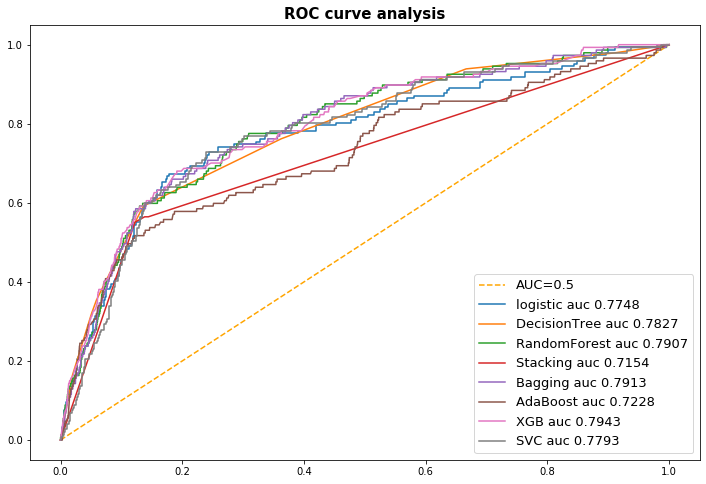

In [894]:
plt.figure(figsize=(12,8))
plt.title('ROC curve analysis', fontweight='bold', fontsize=15)
plt.plot([0,1], [0,1], color='orange', linestyle='--',label='AUC=0.5')
plt.legend(loc='best')

plt.plot(fpr1,tpr1,label='logistic auc '+"%.4f" % roc_auc_score(y_test,y_pred_lr_proba))
plt.legend(loc='best')

plt.plot(fpr2,tpr2,label='DecisionTree auc '+"%.4f" % roc_auc_score(y_test,dt_pred_proba))
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr3,tpr3,label='RandomForest auc '+"%.4f" % roc_auc_score(y_test,y_pred_rf_proba))
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr4,tpr4,label='Stacking auc '+"%.4f" % roc_auc_score(y_test,y_pred_sclf_proba))
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr5,tpr5,label='Bagging auc '+"%.4f" % roc_auc_score(y_test,y_pred_bagging_proba))
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr6,tpr6,label='AdaBoost auc '+"%.4f" % roc_auc_score(y_test,y_pred_ada_gs_proba))
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr7,tpr7,label='XGB auc '+"%.4f" % roc_auc_score(y_test,y_pred_xgb_gs_proba))
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr8,tpr8,label='SVC auc '+"%.4f" % roc_auc_score(y_test,svc_pred_proba[:,1]))
plt.legend(prop={'size':13}, loc='best')

In [895]:
precision_score_df = pd.DataFrame()
precision_score_df['Models'] = ['Logistic','DecisionTree','RandomForest','Stacking','Bagging','AdaBoost','XGB','SVC']
precision_score_df['precision_score'] = [precision_score(y_test,y_pred_lr,average='weighted'),precision_score(y_test,dt_pred,average='weighted'),precision_score(y_test,y_pred_rf,average='weighted'),precision_score(y_test,y_pred_sclf,average='weighted'),precision_score(y_test,y_pred_bagging,average='weighted'),precision_score(y_test,y_pred_ada_gs,average='weighted'),precision_score(y_test,y_pred_xgb_gs,average='weighted'),precision_score(y_test,svc_pred,average='weighted')]

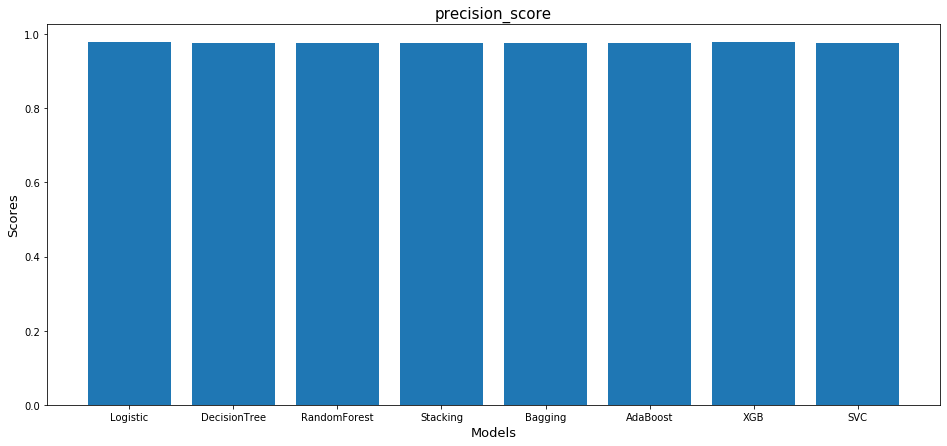

In [897]:
plt.figure(figsize=(16,7))
plt.bar(precision_score_df['Models'],precision_score_df['precision_score'])
plt.title('precision_score',fontsize=15)
plt.xlabel('Models',fontsize=13)
plt.ylabel('Scores',fontsize=13)
plt.show()

In [913]:
precision_score_df

,Models,precision_score
0,Logistic,0.977580
1,DecisionTree,0.976787
2,RandomForest,0.976888
3,Stacking,0.976188
4,Bagging,0.975762
5,AdaBoost,0.975574
6,XGB,0.977711
7,SVC,0.976824


In [941]:
precision_score_df[precision_score_df['precision_score']==precision_score_df['precision_score'].max()]

,Models,precision_score
6,XGB,0.977711


In [936]:
recall_score_df = pd.DataFrame()
recall_score_df['Models'] = ['Logistic','DecisionTree','RandomForest','Stacking','Bagging','AdaBoost','XGB','SVC']
recall_score_df['recall_score'] = [recall_score(y_test,y_pred_lr,average='weighted'),recall_score(y_test,dt_pred,average='weighted'),recall_score(y_test,y_pred_rf,average='weighted'),recall_score(y_test,y_pred_sclf,average='weighted'),recall_score(y_test,y_pred_bagging,average='weighted'),recall_score(y_test,y_pred_ada_gs,average='weighted'),recall_score(y_test,y_pred_xgb_gs,average='weighted'),recall_score(y_test,svc_pred,average='weighted')]

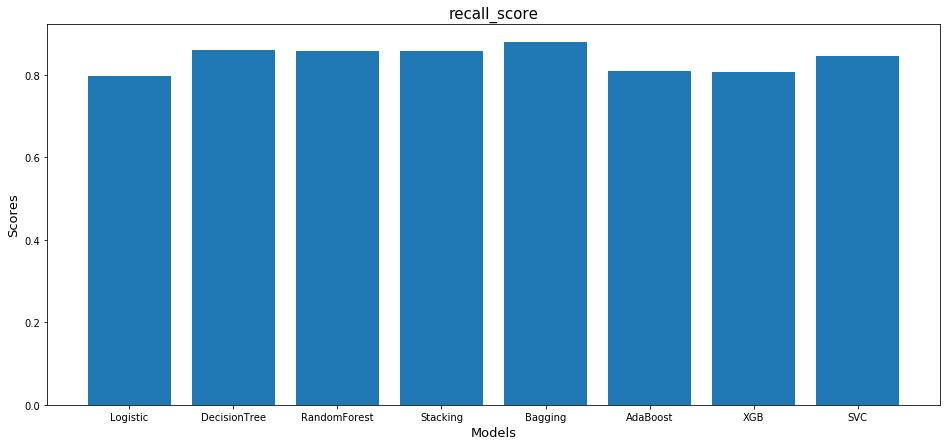

In [937]:
plt.figure(figsize=(16,7))
plt.bar(recall_score_df['Models'],recall_score_df['recall_score'])
plt.title('recall_score',fontsize=15)
plt.xlabel('Models',fontsize=13)
plt.ylabel('Scores',fontsize=13)
plt.show()

In [938]:
recall_score_df

,Models,recall_score
0,Logistic,0.796797
1,DecisionTree,0.859495
2,RandomForest,0.857240
3,Stacking,0.856901
4,Bagging,0.878778
5,AdaBoost,0.808976
6,XGB,0.806946
7,SVC,0.844610


In [942]:
recall_score_df[recall_score_df['recall_score']==recall_score_df['recall_score'].max()]

,Models,recall_score
4,Bagging,0.878778


In [900]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_bagging).ravel()
print('ConfusionMatrix for bagging model')
print('tp    ','fp')
print(tp,'  ',fp)
print('fn    ','tn')
print(fn,'  ',tn,'\n')
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_xgb_gs).ravel()
print('ConfusionMatrix for xgb model')
print('tp    ','fp')
print(tp,'  ',fp)
print('fn    ','tn')
print(fn,'  ',tn)

ConfusionMatrix for bagging model
tp     fp
77    1005
fn     tn
70    7716 

ConfusionMatrix for xgb model
tp     fp
99    1664
fn     tn
48    7057


In [907]:
# Code starts here
l1 = [20,40,60,80,100,120]
scores1 = []
for j in l1:
    test1 = SelectKBest(score_func=f_classif,k=j)
    X_train3 = test1.fit_transform(X_train,y_train)
    X_test3 = test1.transform(X_test)
    model3 = XGBClassifier(random_state=42,scale_pos_weight = 34881/589,learning_rate=0.1,max_depth=1,n_estimators=150)
    model3.fit(X_train3,y_train)
    anova_pred=model3.predict(X_test3)
    scores1.append(precision_score(y_test,anova_pred,average='weighted'))
    max_index1 = scores1.index(max(scores1))
    best_k1 = l1[max_index1]
# Calculate accuracy , print out the Confusion Matrix 
print(best_k1,'columns will give the best score which is',max(scores1))   

32 columns will give the best score which is 0.9779462382039315


In [ ]:
l2 = [20,40,60]
scores2 = []
for k in l2:
    model4 = BaggingClassifier(rf_clf, random_state=42,n_estimators=100,max_samples=11800)
    pca = PCA(n_components=k,random_state=101)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model4.fit(X_train_pca,y_train)
    pca_pred=model4.predict(X_test_pca)
    scores2.append(precision_score(y_test,pca_pred,average='weighted'))
    max_index2 = scores2.index(max(scores2))
    best_k2 = l2[max_index2]
# Calculate accuracy , print out the Confusion Matrix 
print(best_k2,'columns will give the best score which is',max(scores2))

In [948]:
l2 = []
scores2 = []
for k in l2:
    model4 = BaggingClassifier(rf_clf, random_state=42,n_estimators=100,max_samples=11800)
    pca = PCA(n_components=k,random_state=101)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model4.fit(X_train_pca,y_train)
    pca_pred=model4.predict(X_test_pca)
    scores2.append(precision_score(y_test,pca_pred,average='weighted'))
    max_index2 = scores2.index(max(scores2))
    best_k2 = l2[max_index2]
# Calculate accuracy , print out the Confusion Matrix 
print(best_k2,'columns will give the best score which is',max(scores2))

50 columns will give the best score which is 0.9768889372005699


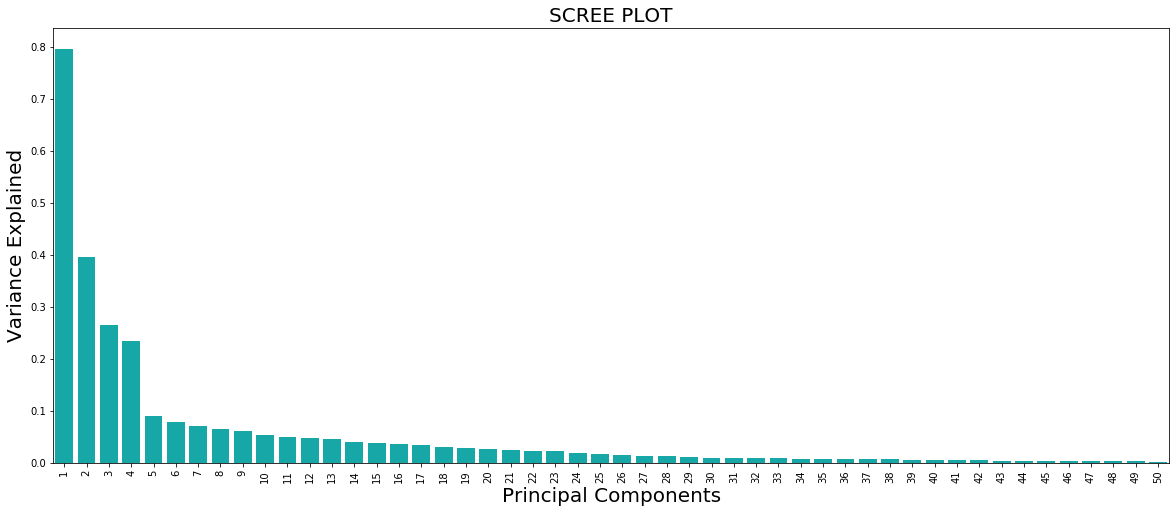

In [950]:
plt.figure(figsize=(20,8))
df_pca = pd.DataFrame({'var':pca.explained_variance_,'PC':range(1,51)})
sns.barplot(x='PC',y="var", data=df_pca, color="c")
plt.xticks(rotation=90)
plt.title('SCREE PLOT',fontsize=20)
plt.xlabel('Principal Components',fontsize=20)
plt.ylabel('Variance Explained',fontsize=20)
plt.show()

In [ ]:
scores3 = []
l3 = [20,45,60,80,100]
for n in l3:
    model5 = BaggingClassifier(rf_clf, random_state=42,n_estimators=100,max_samples=11800)
    rfe = RFE(model5, n) 
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model5.fit(X_train_rfe,y_train)
    rfe_pred=model5.predict(X_test_rfe)
    scores3.append(precision_score(y_test,rfe_pred,average='weighted'))
    max_index = scores3.index(max(scores3))
    b_num = l3[max_index]#n if model.score(X_test_rfe,y_test)== max(scores) else max(scores)
print(b_num,'gives the best score which is',max(scores3)) 

In [ ]:
# bagging_clf = BaggingClassifier(rf_clf, random_state=42,n_estimators=100,max_samples=11800)
# bagging_clf.fit(X_train,y_train)
# y_pred_bagging = bagging_clf.predict(X_test)
# y_pred_bagging_proba = np.array(pd.DataFrame(bagging_clf.predict_proba(X_test)).iloc[:,1])
# bagging_clf.score(X_test,y_test)

In [61]:
# rf_clf = RandomForestClassifier(random_state = 264,criterion='gini', max_depth=7,n_estimators= 151,class_weight='balanced')
# bagging_clf = BaggingClassifier(rf_clf, random_state=42,n_estimators=100,max_samples=11800)
# bagging_clf.fit(X,y)
# y_valid = bagging_clf.predict(df_valid_new)

In [63]:
print(y_valid.shape)
submission = pd.read_csv('sample_submission(hackathon).csv')
print(submission['Claim'].shape)
submission['Claim'] = y_valid

(12661,)
(12661,)


In [64]:
submission['Claim'].value_counts()

0    11187
1     1474
Name: Claim, dtype: int64

In [67]:
submission.to_csv('submission.csv')